## Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [4]:
### These 4 columns are not necesary for prediction

## EDA

In [5]:
df.shape

(891, 8)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [7]:
### We can drop the Cabin column because it has almost 75% null values and for age column, we need to give some values.

In [8]:
df.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

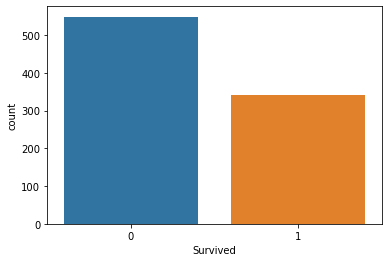

In [9]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

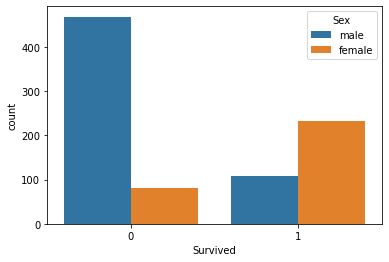

In [10]:
sns.countplot(df['Survived'],hue=df['Sex'])

### Women are survived more in number than men.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

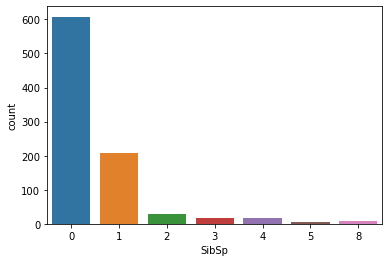

In [11]:
sns.countplot(df['SibSp'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

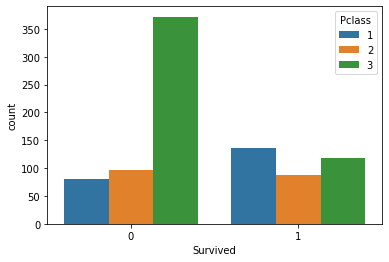

In [12]:
sns.countplot(df['Survived'],hue=df['Pclass'])

### People in class 3 has less survival rate

<AxesSubplot:xlabel='Age', ylabel='Density'>

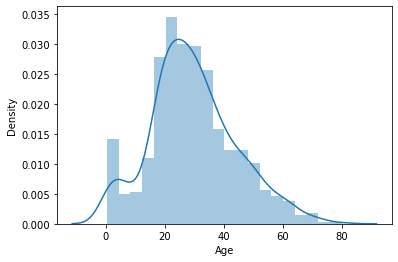

In [13]:
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

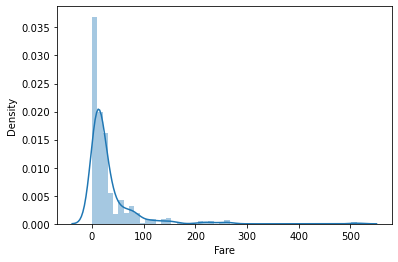

In [14]:
sns.distplot(df['Fare'].dropna())

<AxesSubplot:xlabel='Fare'>

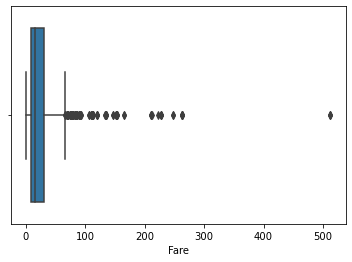

In [15]:
sns.boxplot(df['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

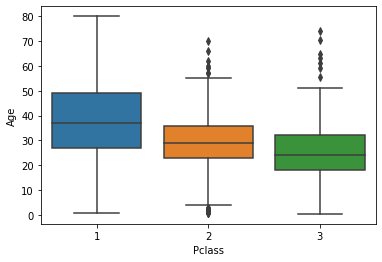

In [16]:
sns.boxplot(x=df['Pclass'],y=df['Age'])

### We are taking this plot because most of the people with old age are rich than the young people. So the rich people take pclass-1 as it is costlier.
### avg. age of p1 class - 38
### avg. age of p2 class - 29
### avg. age of p3 class - 24

## Handling Missing Values

In [17]:
def p_age(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [18]:
df['Age']=df[['Age','Pclass']].apply(p_age,axis=1)

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Encoding

In [20]:
t=['Sex','Pclass']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in t:
    df[i]=label.fit_transform(df[i].values.reshape(-1,1))

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,22.0,1,0,7.2500
1,1,0,0,38.0,1,0,71.2833
2,1,2,0,26.0,0,0,7.9250
3,1,0,0,35.0,1,0,53.1000
4,0,2,1,35.0,0,0,8.0500


## Removing Outliers

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
n_df=df[(z<3).all(axis=1)]
n_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,22.0,1,0,7.2500
1,1,0,0,38.0,1,0,71.2833
2,1,2,0,26.0,0,0,7.9250
3,1,0,0,35.0,1,0,53.1000
4,0,2,1,35.0,0,0,8.0500


In [23]:
df.shape

(891, 7)

In [24]:
n_df.shape

(820, 7)

In [25]:
dataloss=(891-820)/891
print(dataloss*100)

7.968574635241302


### Here dataloss is greater than 7.5%, so no need to remove outliers and can choose the given data frame itself

In [26]:
x=df.drop('Survived',axis=1)
y=df['Survived']

## Sampling

In [27]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [28]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.929741,0.892779,-0.523889,0.504229,-0.477464,-0.511583
1,-1.374674,-1.120098,0.665030,0.504229,-0.477464,0.576662
2,0.929741,-1.120098,-0.226660,-0.463679,-0.477464,-0.500112
3,-1.374674,-1.120098,0.442107,0.504229,-0.477464,0.267637
4,0.929741,0.892779,0.442107,-0.463679,-0.477464,-0.497987


## Choosing Random State Value

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.8545454545454545 ran state= 95


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxran)

## Model Selection

In [32]:
## Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
dtc_clas=classification_report(y_test,pred)
acc1=accuracy_score(y_test,pred)
print(acc1)
print(dtc_clas)

0.8545454545454545
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       150
           1       0.89      0.84      0.86       180

    accuracy                           0.85       330
   macro avg       0.85      0.86      0.85       330
weighted avg       0.86      0.85      0.85       330



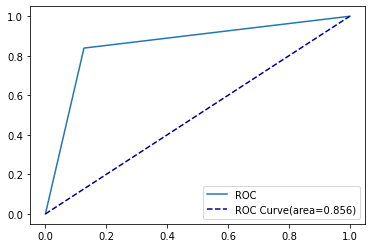

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, pred)
area_under_curve=roc_auc_score(y_test, pred)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

In [34]:
## Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
rfc_clas=classification_report(y_test,pred)
acc2=accuracy_score(y_test,pred)
print(acc2)
print(rfc_clas)

0.8939393939393939
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       150
           1       0.91      0.89      0.90       180

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



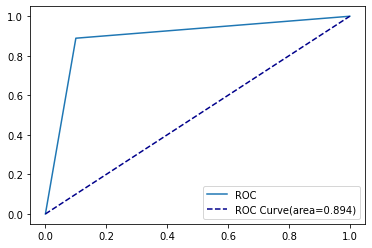

In [35]:
fpr, tpr, thresholds =roc_curve(y_test, pred)
area_under_curve=roc_auc_score(y_test, pred)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

In [36]:
## Support Vectors
from sklearn.svm import SVC
sup=SVC()
sup.fit(x_train,y_train)
pred=sup.predict(x_test)
sv_clas=classification_report(y_test,pred)
acc3=accuracy_score(y_test,pred)
print(acc3)
print(sv_clas)

0.8666666666666667
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       150
           1       0.93      0.82      0.87       180

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



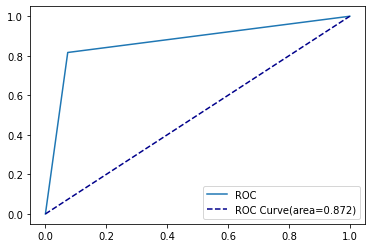

In [37]:
fpr, tpr, thresholds =roc_curve(y_test, pred)
area_under_curve=roc_auc_score(y_test, pred)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

In [38]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
lr_clas=classification_report(y_test,pred)
acc4=accuracy_score(y_test,pred)
print(acc4)
print(lr_clas)

0.8424242424242424
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.87      0.83      0.85       180

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



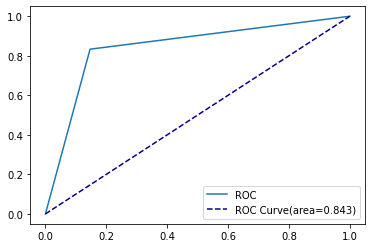

In [39]:
fpr, tpr, thresholds =roc_curve(y_test, pred)
area_under_curve=roc_auc_score(y_test, pred)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=3).mean()
cv2=cross_val_score(rfc,x,y,cv=3).mean()
cv3=cross_val_score(sup,x,y,cv=3).mean()
cv4=cross_val_score(lr,x,y,cv=3).mean()
print(cv1,cv2,cv3,cv4)

0.7996357012750455 0.8415300546448088 0.8342440801457195 0.8123861566484517


In [41]:
print((acc1-cv1),(acc2-cv2),(acc3-cv3),(acc4-cv4))

0.054909753270409034 0.05240933929458513 0.032422586520947205 0.0300380857757907


### We can choose Logistic Regression as our model since its cv_score and accuracy score are almost similar

## Hyper Parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1', 'l2', 'elasticnet','none'],'dual':[True,False],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
           'random_state':list(range(1,20))}
gsc=GridSearchCV(lr,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'dual': False, 'penalty': 'none', 'random_state': 1, 'solver': 'newton-cg'}


In [45]:
final_survive=LogisticRegression(dual=False,penalty='none',random_state=1,solver='newton-cg')
final_survive.fit(x_train,y_train)
pred=final_survive.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
lr_acc*100

84.24242424242424

## Saving The Model

In [46]:
import joblib
joblib.dump(final_survive,'Final_survive_mod.pkl')

['Final_survive_mod.pkl']